# Simple CMS Open Data Plot

Demonstrates a simple plot of Muon Track pT from the [CMS OpenData Higgs to 4 lepton dataset](http://opendata.cern.ch/record/1507). The dataset number (picked from the URL) is 1507.

In [1]:
from func_adl_servicex import ServiceXSourceCMSRun1AOD
from hist import Hist
import mplhep as mpl

# This is CMS data...
# mpl.style.use(mpl.style.CMS)

The following fetches the data - for reference, when testing, on my home machine running a developer version of k8s, and 5 transformers, this took 8 minutes. My network connection was not saturated. **Replace this when we can run on something big like the `river` cluster.

In [2]:
data = ServiceXSourceCMSRun1AOD("cernopendata://16") \
    .SelectMany(lambda e: e.TrackMuons("globalMuons")) \
    .Select(lambda m: m.pt()) \
    .AsAwkwardArray(['mu_pt']) \
    .value()

2]
        Downloaded: 100%|█████████▉| 1696/1697 [29:01]
                                                     
        Downloaded: 100%|██████████| 1697/1697 [29:07]
                                                      

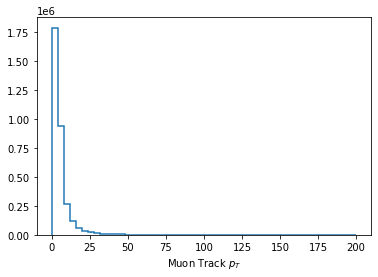

In [3]:
h = (Hist.new
     .Reg(50, 0, 200, name='mu_pt', label='Muon Track $p_T$')
     .Int64()
     )
h.fill(data['mu_pt'])
_ = h.plot()

Some quick notes on running:

| Dataset | Files | Time | Dataset Size | Column Size | Notes |
| :- | -: | -: | -: | -: | -: |
| [cernopendata://1507](http://opendata.cern.ch/record/1507) | 22 | 4:00 | 58.2 GB | 3 MB | |
| [cernopendata://16](http://opendata.cern.ch/record/16) | 1697 | 29:07 | 6.7 TB | 33 MB | Took 35 secs to resolve DID |
